In [1]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the data
lendingDataCSV = pd.read_csv('Resources/lending_data.csv')

In [3]:
# view data
lendingDataCSV.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## I believe borrower_income, debt_to_income will be the major factors in determining loan_status. 
- In the below cells I attempt to manufacture a feature to use to predict an approved credit status. This is for my own exploration to gauge my understanding of ML.

- The scikit learn portion of my homework following the required steps will be below my matplotlib scatter plot

In [4]:
# Attempted to create my own feature 
lendingDataCSV['incomeADJ']= (lendingDataCSV['borrower_income']*lendingDataCSV['debt_to_income']) - (lendingDataCSV['loan_size']/lendingDataCSV['interest_rate'])

In [5]:
# create empty list
feature = []
target = []

# for loop to create feature lists to add to above created list

for i in range(len(lendingDataCSV)):
    featureList = []
    loanStatus = ''
    
    loanStatus = lendingDataCSV.iloc[i,7]
    featureList.append(lendingDataCSV.iloc[i,0])
    featureList.append(lendingDataCSV.iloc[i,8])
    # feature.append(newDF.iloc[i,5])
    # feature.append(newDF.iloc[i,6])
    # feature.append(newDF.iloc[i,9]) 
    # feature.append(newDF.iloc[i,8])
    
    feature.append(featureList)
    target.append(loanStatus)
    
print(feature[:5])
print(target[:5])

[[10700.0, 21405.318039624617], [8400.0, 12344.76987447698], [9000.0, 14807.453683757005], [10700.0, 21303.862212943626], [10800.0, 21597.038191738095]]
[0, 0, 0, 0, 0]


In [6]:
# Turn python lists into numpy arrays
features = np.array(feature)
targets = np.array(target)
features

array([[10700.        , 21405.31803962],
       [ 8400.        , 12344.76987448],
       [ 9000.        , 14807.45368376],
       ...,
       [17600.        , 48638.83907504],
       [16300.        , 43681.00913786],
       [15600.        , 40698.68610142]])

In [7]:
# finding standard deviation and mean of each column
featureSTDEV = features.std()
featureAVG = np.average(features)
featureSTDEV

7263.7159308212895

In [8]:
# create a dataframe with normalized features 
featuresNORM = (features - featureAVG)/featureSTDEV
df = pd.DataFrame(data = featuresNORM)
df['loan_status'] = targets
df

,0,1,loan_status
0,-0.433298,1.040510,0
1,-0.749940,-0.206861,0
2,-0.667338,0.132178,0
3,-0.433298,1.026542,0
4,-0.419531,1.066904,0
...,...,...,...
77531,0.723135,5.652276,1
77532,0.530396,4.872513,1
77533,0.516629,4.789764,1
77534,0.337658,4.107217,1


In [9]:
# create variables to visualize data
approved = df[df['loan_status'] == 1][[0,1]]
notApproved = df[df['loan_status'] == 0][[0,1]]
approved[:5]

,0,1
75036,0.668067,5.419455
75037,0.557931,4.967850
75038,0.612999,5.186609
75039,0.668067,5.433348
75040,0.434027,4.475602


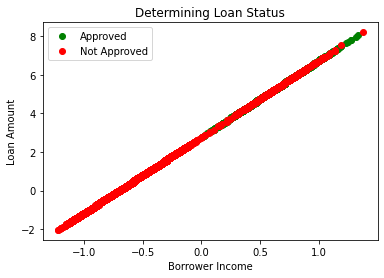

In [10]:
# create visualization to show relationship of created "income adjusted" feature to loan amount
# I was not succesful in manufacturing a feature that would show a relationship

figure1, figure1_axes = plt.subplots()
figure1_axes.plot(approved[[0]], approved[[1]], 'go',
                  notApproved[[0]], notApproved[[1]], 'ro')
figure1_axes.set_xlabel('Borrower Income')
figure1_axes.set_ylabel('Loan Amount')
figure1_axes.legend(['Approved', 'Not Approved'])
figure1_axes.set_title('Determining Loan Status');

## Moving ahead with demonstrating use of sci-kit learn, the above exploration shows I was incorrect in my assumption but I am unsure of correct features to pick

In [11]:
# create empty list
feature = []
target = []

# for loop to create feature lists to add to above created list

for i in range(len(lendingDataCSV)):
    featureList = []
    loanStatus = ''
    
    loanStatus = lendingDataCSV.iloc[i,7]
#     borrower_income
    featureList.append(lendingDataCSV.iloc[i,2])
#    debt_to_income
    featureList.append(lendingDataCSV.iloc[i,3])
    
    feature.append(featureList)
    target.append(loanStatus)
    
print(feature[:5])
print(target[:5])

[[52800, 0.431818181818182], [43600, 0.311926605504587], [46100, 0.349240780911063], [52700, 0.430740037950664], [53000, 0.433962264150943]]
[0, 0, 0, 0, 0]


In [12]:
# Split the data into X_train, X_test, y_train, y_test

x = np.array(feature)
y = np.array(target)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
# Train a Logistic Regression model print the model score
logisticRegr = LogisticRegression(
    solver='lbfgs', 
    max_iter=100,
    random_state=0
)
logisticRegr.fit(x_train, y_train)
print("LogisticRegression score: ", logisticRegr.score(x_test, y_test))

LogisticRegression score:  0.9685307470078415


In [14]:
# Train a Random Forest Classifier model and print the model score
randomForestClass = RandomForestClassifier(random_state=0)
randomForestClass.fit(x_train, y_train)
print("RandomForestClassifier score: ", randomForestClass.score(x_test, y_test))

RandomForestClassifier score:  0.9938093272802311
